[[4.02400019e-06 2.76499941e-06 3.20300023e-06 4.54099973e-06
  6.55100030e-06 2.83959998e-05 4.94659998e-05 1.44302000e-04]
 [7.02263000e-04 2.42354900e-03 1.04739410e-02 3.81266910e-02
  1.48081611e-01 6.55759085e-01 2.62134025e+00 1.07052074e+01]
 [2.25310600e-03 5.67808700e-03 1.98628270e-02 5.23489680e-02
  1.57853977e-01 4.77514610e-01 1.37625840e+00 4.07076563e+00]]


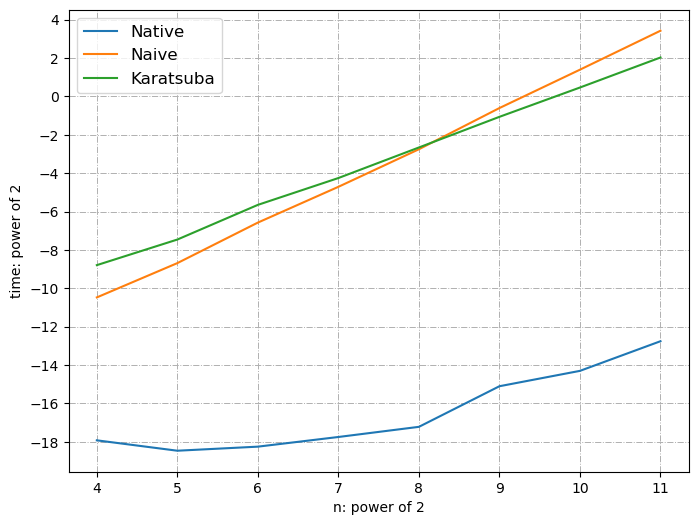

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import string
import random

np.random.seed(0)


def naive(x, y):
    s = []  # 保存x和y的每一位相乘得到的数
    i = 0  # 用于记录右补零的个数
    for b in y[::-1]:  # 逆序遍历 从低位到高位
        p = 0  # 初始进位为零
        ss = str()
        for a in x[::-1]:  # 逆序遍历 从低位到高位
            p, q = divmod(int(a) * int(b) + p, 10)  # a * b + 后一位进来的p = 进到下一位的p * 10 + q
            ss += str(q)
        ss += str(p)
        ss = ss.rjust(len(ss) + i, "0").ljust(2 * n, "0")  # 左右补零保证数位对齐
        i += 1
        s.append(ss)

    # 对列表s中的n个2n位数求和
    xy = str()
    p = 0  # 初始进位为零
    for j in range(2 * n):  # 遍历每个数位
        ss = p
        for i in range(n):  # 对n个数的第j位求和
            ss += int(s[i][j])
        p, q = divmod(ss, 10)  # ss = p * 10 + q
        xy += str(q)
    xy += str(p)
    xy = xy[::-1].lstrip("0")
    return int(xy)


def karatsuba(x, y):
    n_x, n_y = len(x), len(y)

    if n_x == 1 or n_y == 1:  # 如果其中一个数只有1位 不再递归
        return int(x) * int(y)

    # 若数位不相同，将短的左边补零
    if n_x < n_y:
        x = x.rjust(n_y, "0")
        n = n_y
    else:
        y = y.rjust(n_x, "0")
        n = n_x

    a, b = x[0:int(n / 2)], x[int(n / 2): n]
    c, d = y[0:int(n / 2)], y[int(n / 2): n]

    # 三个递归子问题
    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    ad_bc = karatsuba(str(int(a) + int(b)), str(int(c) + int(d))) - ac - bd

    ad_bc_coef = 1
    if ad_bc < 0:  # 负整数转成字符串最前面会有负号
        ad_bc = - ad_bc
        ad_bc_coef = - 1

    ac, bd, ad_bc = str(ac), str(bd), str(ad_bc)

    # 左右补零保证数位对齐
    ac = ac.ljust(len(ac) + 2 * n - 2 * int(n / 2), "0").rjust(2 * n, "0")
    bd = bd.rjust(2 * n, "0")
    ad_bc = ad_bc.ljust(len(ad_bc) + n - int(n / 2), "0").rjust(2 * n, "0")

    xy = str()
    p = 0  # 初始进位为零
    for j in range(2 * n - 1, -1, -1):
        p, q = divmod(p + int(ac[j]) + ad_bc_coef * int(ad_bc[j]) + int(bd[j]), 10)
        xy += str(q)
    xy += str(p)
    xy = xy[::-1].lstrip("0")
    if xy.strip() == "":
        return 0
    else:
        return int(xy)


trial = 8
time_cost = np.empty((3, trial))
for t in range(trial):
    n = 2**(t + 4)  # 2^4, 2^5, ..., 2^11

    # 随机生成x和y
    x, y = ''.join(random.choices(string.digits, k=n)), ''.join(random.choices(string.digits, k=n))
    int_x, int_y = int(x), int(y)

    start = time.perf_counter()
    xy1 = int_x * int_y
    time_cost[0, t] = time.perf_counter() - start

    start = time.perf_counter()
    xy2 = naive(x, y)
    time_cost[1, t] = time.perf_counter() - start

    start = time.perf_counter()
    xy3 = karatsuba(x, y)
    time_cost[2, t] = time.perf_counter() - start

    # print(xy1 - xy2, xy1 - xy3)

print(time_cost)

_, ax = plt.subplots(figsize=(8, 6))
x = [v + 4 for v in range(trial)]
ax.plot(x, np.log2(time_cost[0, :]), label="Native")  # 对数坐标轴
ax.plot(x, np.log2(time_cost[1, :]), label="Naive")
ax.plot(x, np.log2(time_cost[2, :]), label="Karatsuba")
ax.set_xlabel("n: power of 2")
ax.set_ylabel("time: power of 2")
ax.legend(loc="best", fontsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.grid(linestyle='-.', linewidth=0.7)
plt.show()

[[4.27599934e-06 4.20099968e-06 4.45299975e-06 4.57999977e-06
  6.06899994e-06 1.63369996e-05 4.88799997e-05 1.42946999e-04]
 [4.55815000e-04 2.20340500e-03 7.91105500e-03 2.49271250e-02
  1.03344385e-01 4.19223110e-01 1.63687292e+00 6.36853754e+00]
 [9.68596000e-04 2.97929900e-03 6.02124100e-03 1.83612240e-02
  5.55575440e-02 1.47342614e-01 4.06995762e-01 1.22807837e+00]]


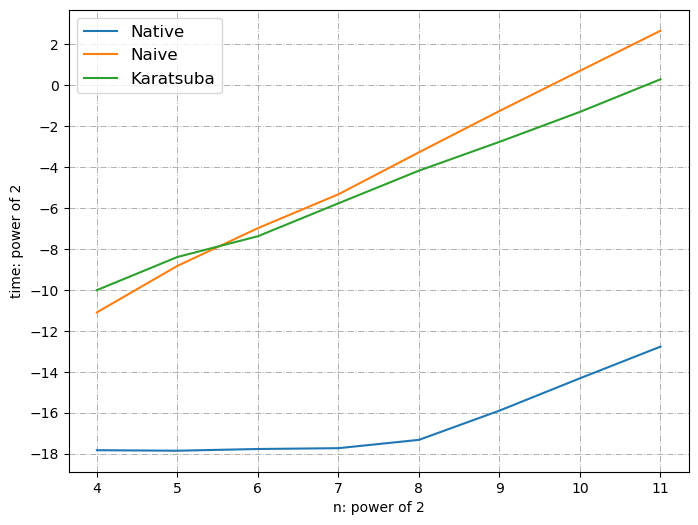

In [15]:
import time
import numpy as np
import matplotlib.pyplot as plt
import string
import random

np.random.seed(0)


def naive(x, y):
    s, i = 0, 0
    for b in y[::-1]:  # 逆序遍历 从低位到高位
        p = 0  # 初始进位为零
        ss = str()
        for a in x[::-1]:  # 逆序遍历 从低位到高位
            p, q = divmod(int(a) * int(b) + p, 10)  # a * b + 后一位进来的p = 进到下一位的p * 10 + q
            ss += str(q)
        ss += str(p)
        s += int(ss[::-1]) * 10**i
        i += 1
    return s


def karatsuba(x, y):
    n_x, n_y = len(x), len(y)
    if n_x == 1 or n_y == 1:  # 如果其中一个数只有1位 不再递归
        return int(x) * int(y)

    # 若数位不相同，将短的左边补零
    if n_x < n_y:
        x = x.rjust(n_y, "0")
        n = n_y
    else:
        y = y.rjust(n_x, "0")
        n = n_x

    a, b = x[0:int(n / 2)], x[int(n / 2): n]
    c, d = y[0:int(n / 2)], y[int(n / 2): n]

    # 三个递归子问题
    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    ad_bc = karatsuba(str(int(a) + int(b)), str(int(c) + int(d))) - ac - bd

    return ac * 10**(2 * n - 2 * int(n / 2)) + ad_bc * 10**(n - int(n / 2)) + bd


trial = 8
time_cost = np.empty((3, trial))
for t in range(trial):
    n = 2**(t + 4)  # 2^4, 2^5, ..., 2^11

    # 随机生成x和y
    x, y = ''.join(random.choices(string.digits, k=n)), ''.join(random.choices(string.digits, k=n))
    int_x, int_y = int(x), int(y)

    start = time.perf_counter()
    xy1 = int_x * int_y
    time_cost[0, t] = time.perf_counter() - start

    start = time.perf_counter()
    xy2 = naive(x, y)
    time_cost[1, t] = time.perf_counter() - start

    start = time.perf_counter()
    xy3 = karatsuba(x, y)
    time_cost[2, t] = time.perf_counter() - start

    # print(xy1 - xy2, xy1 - xy3)

print(time_cost)

_, ax = plt.subplots(figsize=(8, 6))
x = [v + 4 for v in range(trial)]
ax.plot(x, np.log2(time_cost[0, :]), label="Native")  # 对数坐标轴
ax.plot(x, np.log2(time_cost[1, :]), label="Naive")
ax.plot(x, np.log2(time_cost[2, :]), label="Karatsuba")
ax.set_xlabel("n: power of 2")
ax.set_ylabel("time: power of 2")
ax.legend(loc="best", fontsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.grid(linestyle='-.', linewidth=0.7)
plt.show()